# Sampling and the Central Limit Theorem

##### Keywords: central limit theorem, sampling, normal distribution,  standard error, sampling distribution of variance, sampling distribution

## Contents
{:.no_toc}
* 
{: toc}

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


array([ 0.5,  0.8,  0.5,  1. ,  0.7,  0.7,  0.6,  0.6,  0.7,  1. ,  0.7,
        0.4,  0.4,  0.4,  0.4,  0.7,  0.7,  0.5,  0.5,  0.5])

In [10]:
sample_means_at_size_10=sample_means[9]
sample_means_at_size_100=sample_means[99]
sample_means_at_size_1000=sample_means[999]

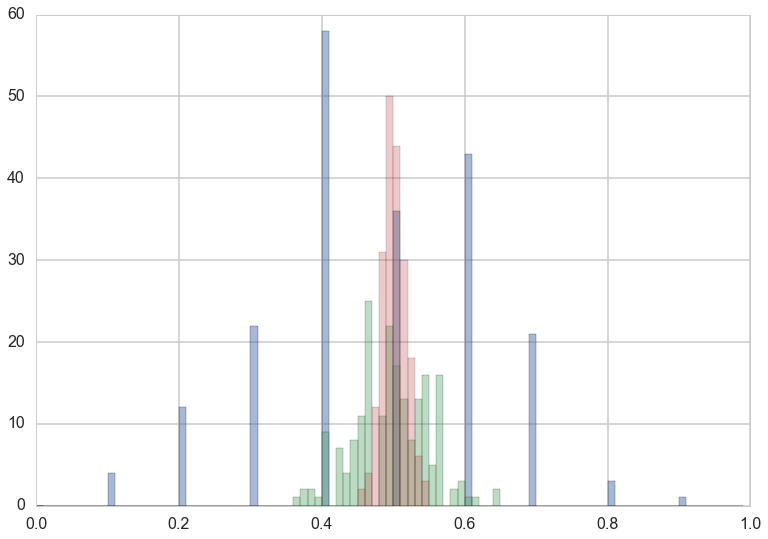

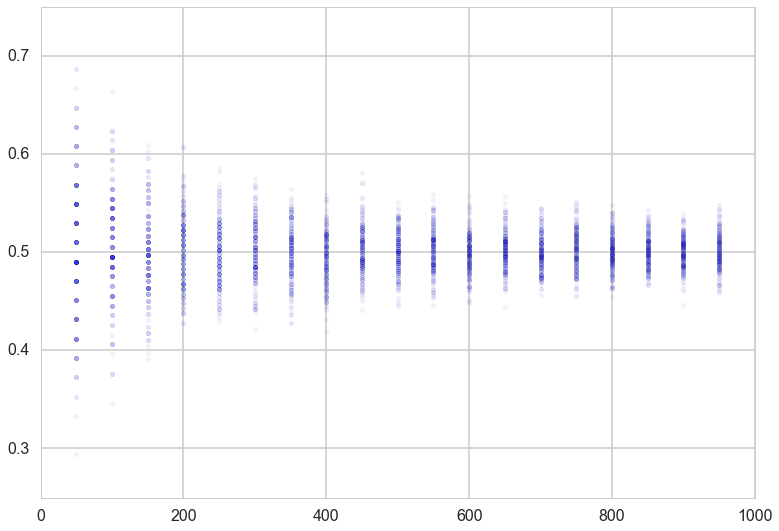

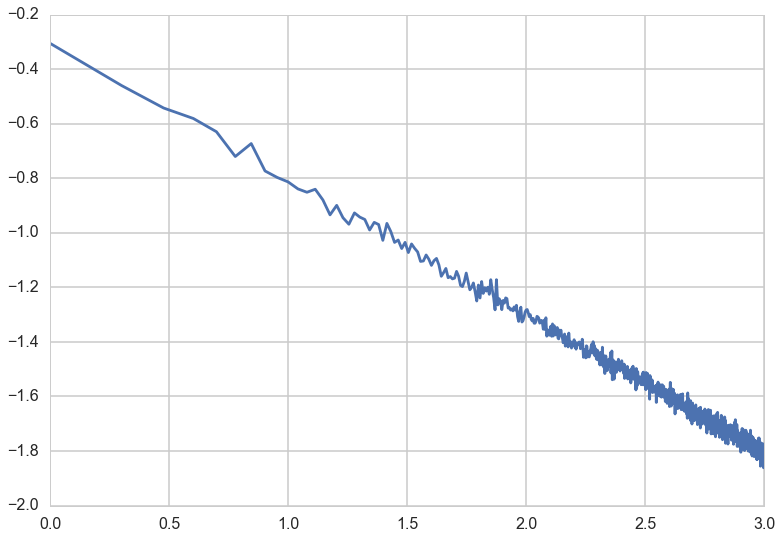

### The Gaussian Distribution

We saw in the last section that the sampling distribution of the mean itself has a mean $\mu$ and variance $\frac{\sigma^2}{N}$. This distribution is called the **Gaussian** or **Normal Distribution**, and is probably the most important distribution in all of statistics.

The probability density of the normal distribution is given as:

$$ N(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2s^2} } .$$

The expected value of the Gaussian distribution is $E[X]=\mu$ and the variance is $Var[X]=s^2$.

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


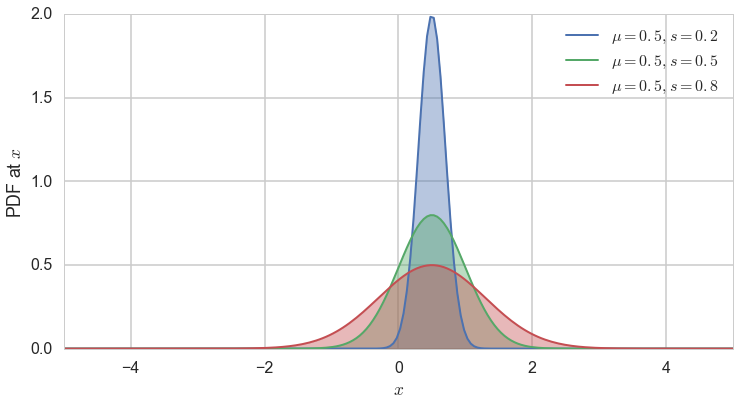

In [23]:
norm =  sp.stats.norm
x = np.linspace(-5,5, num=200)


fig = plt.figure(figsize=(12,6))
for mu, sigma, c in zip([0.5]*3, [0.2, 0.5, 0.8], sns.color_palette()[:3]):
    plt.plot(x, norm.pdf(x, mu, sigma), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, s={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, norm.pdf(x, mu, sigma), color=c, alpha = .4)
    
    
plt.xlim([-5,5])
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$");

## The Central Limit Theorem

The reason for the distribution's importance is the Central Limit Theorem(CLT). The theorem is stated as thus, very similar to the law of large numbers:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables from a random variable $X$. Suppose that $X$ has the finite mean $\mu$ AND finite variance $\sigma^2$. Then the average of the first n of them:**

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to a Gaussian Random Variable with mean $\mu$ and variance $\sigma^2/n$ as $n \to \infty$:**

$$ S_n \sim N(\mu,\frac{\sigma^2}{n}) \, as \, n \to \infty. $$

In other words:

$$s^2 = \frac{\sigma^2}{N}.$$


This is true, *regardless* of the shape of $X$, which could be binomial, poisson, or any other distribution.

Strictly speaking, under some conditions called Lyapunov conditions, the variables $x_i$ dont have to be identically distributed, as long as $\mu$ is the mean of the means and $\sigma^2$ is the sum of the individual variances. This has major consequences, for the importance of this theorem.

Many random variables can be thought of as having come from the sum of a large number of small and independent effects. For example human height or weight can be thought of as the sum as a large number of genetic and environmental factors, which add to increase or decrease height or weight respectively. Or think of a measurement of a height. There are lots of ways things could go wrong: frayed tapes, stretched tapes, smudged marks, bad lining up of the eye, etc. These are all independent and have no systematic error in one direction or the other.

Then the sum of these factors, as long as there are a large number of them, will be distributed as a gaussian.[this has nothing to do with the sampling distribution of the mean but is part of the origin story of the gaussian distribution]

As a rule of thumb, the CLT starts holding at $N \sim 30$.

### What does this all mean?

The sample mean, or mean of the random variables $x_{mi}$ in the sample $m$, has a sampling distribution with mean $\mu$ and variance $\frac{\sigma^2}{N}$, as shown before. Now for large sample sizes we can go further and use the CLT theorem to say that this distribution is the normal distribution,

$$S_N \sim N(\mu, \frac{\sigma^2}{N})$$.

The preciseness of saying that we have a gaussian is a huge gain in our expository power. For example, for the case of the weight-watchers program above, a separation of 20lbs is more than 3 standard errors away, which corresponds to being way in the tail of a gaussian distribution. Because we can now quantify the area under the curve, we can say that 99.7\% of the sample means lie within 9lbs of 150. Thus you can way easily reject the possibility that the new sample is from the weight-watchers program with 99.7\% confidence. 

Indeed, the CLT allows us to take the reduction in variance we get from large samples, and make statements in different cases that are quite strong:

1. if we know a lot about the population, and randomly sampled 100 points from it, the sample mean would be with 99.7\% confidence within $0.3\sigma$ of the population mean. And thus, if $\sigma$ is small, the sample mean is quite representative of the population mean.
2. The reverse: if we have a well sampled 100 data points, we could make strong statements about the population as a whole. This is indeed how election polling and other sampling works. 
3. we can infer, as we just did, if a sample is consistent with a population
4. by the same token, you can compare two samples and infer if they are from the same population.

## The sampling distribution of the Variance

At this point you might be curious about what the sampling distribution of the variance looks like, and what can we surmise from it about the variance of the entire sample. We can do this, just like we did for the means. We'll stick with a high number of replicates and plot the mean of the sample variances as well as the truish sampling distribution of the variances at a sample size of 100.

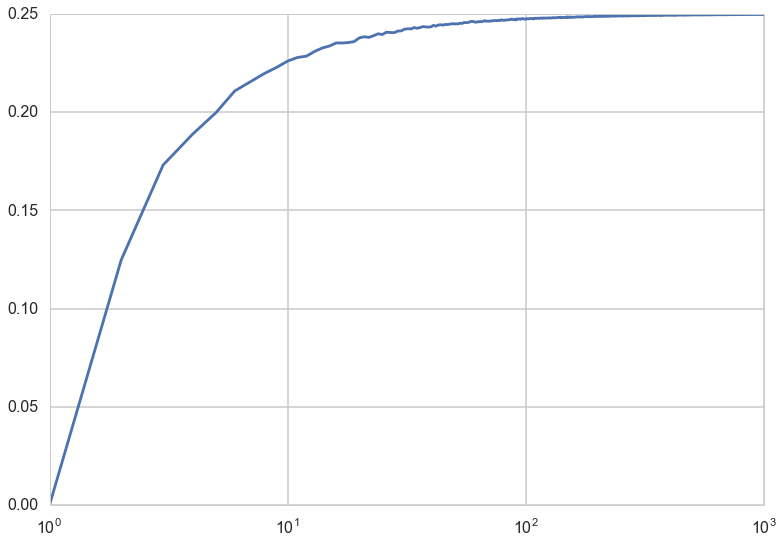

In [24]:
def make_throws_var(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.var(start, axis=1)
sample_vars_1000_replicates = [make_throws_var(number_of_samples=1000, sample_size=i) for i in sample_sizes]
mean_of_sample_vars_1000 = [np.mean(vars) for vars in sample_vars_1000_replicates]
plt.plot(sample_sizes, mean_of_sample_vars_1000);
plt.xscale("log");

The "mean sample variance" asymptotes to the true variance of 0.25 by a sample size of 100. 

How well does the sample variance estimate the true variance? 

If $V_m$ denotes the variance of a sample, 

$$ N\,V_m = \sum_{i=1}^{N} (x_{mi} - \bar{x_m})^2 = \sum_{i=1}^{N}(x_{mi} - \mu)^2 - N\,(\bar{x_m} - \mu)^2. $$

Then
$$E_{\{R\}}(N\,V_m) = E_{\{R\}}(\sum_{i=1}^{N}(x_{mi} - \mu)^2) - E_{\{R\}}(N\,(\bar{x_m} - \mu)^2)$$
In the asymptotic limit of a very large number of replicates, we can then write
$$E(N\,V) = N\,\sigma^2 - \sigma^2, $$
and thus we have
$$E(V) = \frac{N-1}{N} \,\sigma^2$$.

In other words, the expected value of the sample variance is LESS than the actual variance. This should not be surprising: consider for example a sample of size 1 from the population. There is zero variance! More generally, whenever you sample a population, you tend to pick the more likely members of the population, and so the variance in the sample is less than the variance in the population.

An interesting application of this idea, as Shalizi points out in http://www.stat.cmu.edu/~cshalizi/ADAfaEPoV/, is that the loss of variability due to sampling of genes is indeed the origin of genetic drift. More prosaically, the fact that the above graph of expected sample variance against sample size asymptotes to 0.25 is as $\frac{N-1}{N}$ if very close to 1 at large N. 

Or put another way, you ought to correct your sample variances by a factor of $\frac{n}{n-1}$ to estimate the population variance, which itself works as the sampling distribution of the sample variance is rather tight, as seen below.

That is, defining the sample variance with $n-1$ in the denominator instead of $n$ gives you an unbiased eatimator of the true variance. This is why, for example, Pandas will do this by default for series and dataframes. (numpy wont, so beware!).

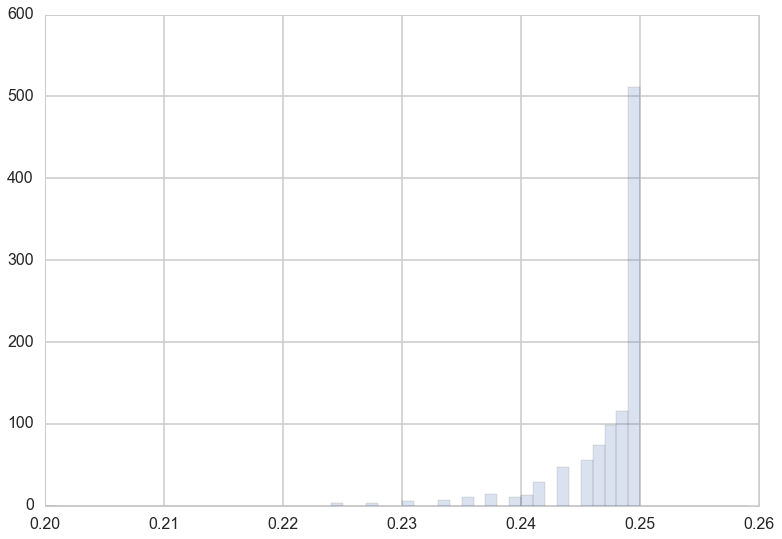

In [25]:
plt.hist(sample_vars_1000_replicates[99], bins=np.arange(0.2,0.26,0.001), alpha=0.2, normed=True);